In [17]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [18]:
# csv 파일을 로딩
df = pd.read_csv("c:/data/iris/iris.csv")
print(df.head())


   SepalLength  SepalWidth  PetalLength  PetalWidth  target  Species
0          5.1         3.5          1.4         0.2  setosa        0
1          4.9         3.0          1.4         0.2  setosa        0
2          4.7         3.2          1.3         0.2  setosa        0
3          4.6         3.1          1.5         0.2  setosa        0
4          5.0         3.6          1.4         0.2  setosa        0


In [19]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'target',
       'Species'],
      dtype='object')

In [20]:
df.shape


(150, 6)

In [21]:
df.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
df["Species"].unique()

array([0, 1, 2], dtype=int64)

In [25]:
# 품종을 기준으로 한 평균값들
df.groupby("Species").mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Text(0, 0.5, 'SepalWidth')

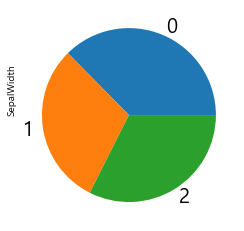

In [26]:
#파이차트
sums_by_species = df.groupby('Species').sum()
var = 'SepalWidth'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
#plt.savefig('iris_pie.png')


         SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                  
0              250.3       171.4         73.1        12.3
1              296.8       138.5        213.0        66.3
2              329.4       148.7        277.6       101.3


<AxesSubplot:xlabel='Species'>

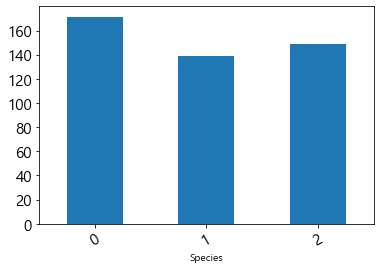

In [27]:
#품종별 변수 합계
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)
var = 'SepalWidth'
#rot (rotation) 글자회전
# (cm) 꽃받침 너비 기준 분류 그래프
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

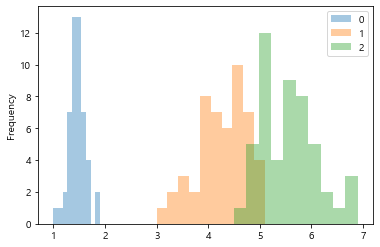

In [28]:
#품종별 꽃잎 길이
for spec in df['Species'].unique():
    subdf = df[df['Species']==spec]
    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')

In [29]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

Text(0.5, 1.0, ' 분류\n (0: setosa, 1: versicolor, 2: virginica )')

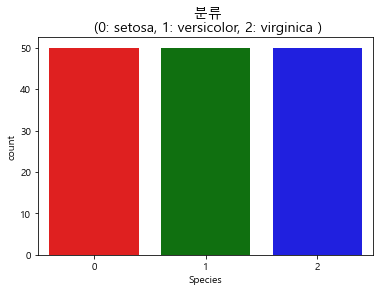

In [31]:
import seaborn as sns
colors = ["red", "green", "blue"]
sns.countplot('Species', data=df, palette=colors)
plt.title(' 분류\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [32]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test))

 학습용: 0.9666666666666667
 검증용: 1.0


In [35]:
#confusion matrix(  혼동행렬, 오분류표 ) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [36]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])
df_cm


,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


<AxesSubplot:title={'center':'Confusion Matrix'}>

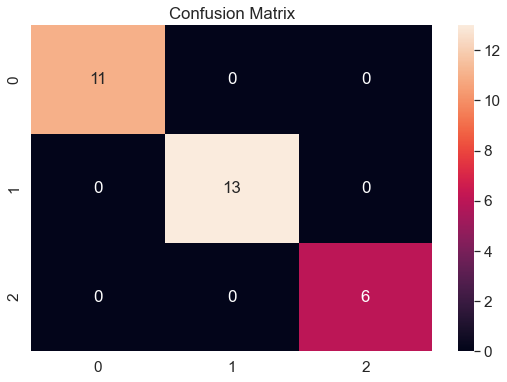

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [38]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [39]:
flowers=['setosa','versicolor','virginica']
# 새로운 데이터 입력
X_new=[[7,3,5,1.4]]
pred=model.predict(X_new)
print(flowers[pred[0]])


versicolor


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
import joblib
# 학습이 완료된 모형을 파일로 저장
joblib.dump(model, 'c:/data/iris/iris_logit.model')

['c:/data/iris/iris_logit.model']

In [44]:
import joblib
# 학습이 완료된 모형을 파일로 저장
model=joblib.load('c:/data/iris/iris_logit.model')


In [45]:
flowers=['setosa', 'versicolor', 'virginica']
# 새로운 데이터 입력
X_new=[[7, 3.0, 5, 1.4]]
pred=model.predict(X_new)
print(' 품종:',flowers[pred[0]])

 품종: versicolor


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
X_new=[[5, 2.9, 1, 0.2]]
pred=model.predict(X_new)
print(' :',flowers[pred[0]])

 : setosa


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
df.shape


(150, 6)

In [48]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [49]:
df["Species"].unique()

array([0, 1, 2], dtype=int64)